# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import Splinter and BeautifulSoup
import json
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
from splinter import Browser

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

driver = webdriver.Chrome( executable_path=r'C:\path\to\chromedriver.exe')
driver.get("http://google.com/")
print ("Chrome Initialized")

/var/folders/r6/0gps4fxs2ygb9zycnt2wczhh0000gn/T/ipykernel_27648/60087417.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome( executable_path=r'C:\path\to\chromedriver.exe')


Chrome Initialized


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [2]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
driver.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [3]:
# Create a Beautiful Soup Object
html = driver.page_source
soup = bs(html, 'html.parser')

In [4]:
# Extract all rows of data
all_data = soup.find_all('tr', class_='data-row')
all_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [5]:
# Extract all rows of data (part 2)
for rows in all_data:
    print(rows.text)


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather = []
# Loop through the scraped data to create a list of rows
for rows in all_data:
    table_data = rows.find_all('td')
    table_rows = [i.text for i in table_data]
    print(table_rows)

    mars_weather.append(table_rows)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(mars_weather, columns=["id", "Terrestrial_Date", "Sol", "ls", "Month", "Min_Temp", "Pressure"])

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,Terrestrial_Date,Sol,ls,Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
Terrestrial_Date    object
Sol                 object
ls                  object
Month               object
Min_Temp            object
Pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_weather_df['id']=mars_weather_df['id'].astype(object)
mars_weather_df['Terrestrial_Date']=pd.to_datetime(mars_weather_df['Terrestrial_Date'])
mars_weather_df[['Sol', 'ls', 'Month']]=mars_weather_df[['Sol', 'ls', 'Month']].astype(int)
mars_weather_df[['Min_Temp', 'Pressure']]=mars_weather_df[['Min_Temp', 'Pressure']].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
Terrestrial_Date    datetime64[ns]
Sol                          int64
ls                           int64
Month                        int64
Min_Temp                   float64
Pressure                   float64
dtype: object

In [12]:
mars_weather_df.head(10)

,id,Terrestrial_Date,Sol,ls,Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [54]:
# 1. How many months are there on Mars?
months = mars_weather_df.groupby('Month')
print (months['Month'].count())
print(f"There are {mars_weather_df['Month'].max()} months on mars.")

Month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: Month, dtype: int64
There are 12 months on mars.


In [60]:
# 2. How many Martian days' worth of data are there?
days=mars_weather_df['Sol'].nunique()
print(f'There are', days ,'days on Mars.')

There are 1867 days on Mars.


In [61]:
# 3. What is the average low temperature by month?
average_low_temp = mars_weather_df[['Month', 'Min_Temp']].groupby(['Month']).mean()
print(f'Average low temp on mars by Month:')
average_low_temp

Average low temp on mars by Month:


,Min_Temp
Month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0.5, 1.0, 'Average Low Temp on Mars by Month')

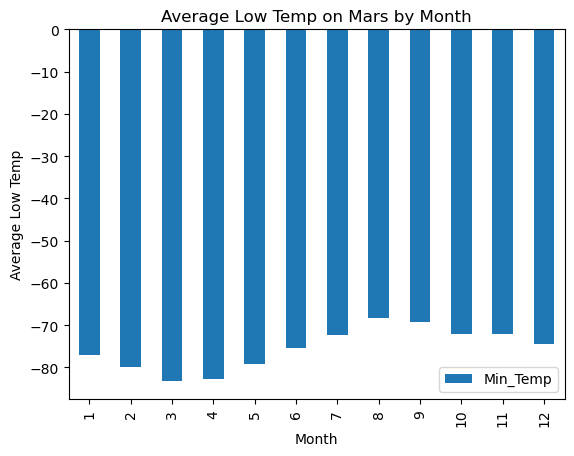

In [67]:
# Plot the average temperature by month
average_low_temp.plot.bar()
plt.ylabel("Average Low Temp")
plt.xlabel("Month")
plt.title("Average Low Temp on Mars by Month")

Text(0.5, 1.0, 'Average Low Temp on Mars by Month')

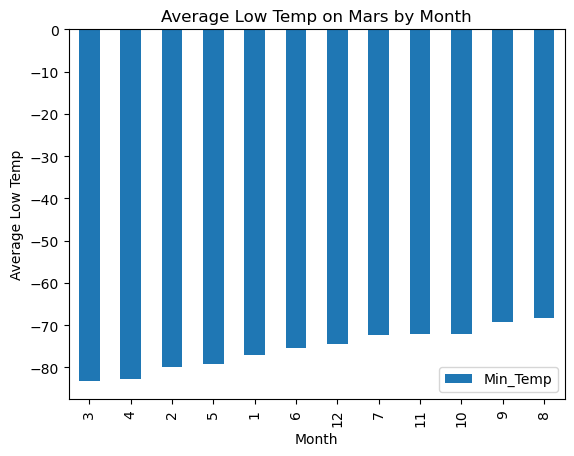

In [71]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temp.sort_values("Min_Temp").plot.bar()
plt.ylabel("Average Low Temp")
plt.xlabel("Month")
plt.title("Average Low Temp on Mars by Month")

In [72]:
# 4. Average pressure by Martian month
average_pressure = mars_weather_df[['Month', 'Pressure']].groupby(['Month']).mean()
print(f'Average pressure on mars by Month:')
average_pressure

Average pressure on mars by Month:


,Pressure
Month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.0, 'Average Pressure on Mars by Month')

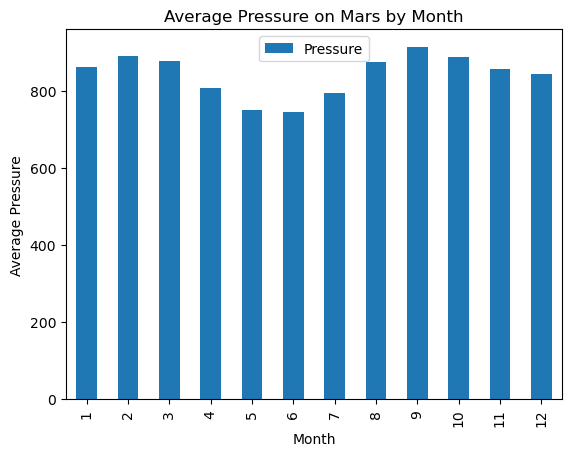

In [73]:
# Plot the average pressure by month
average_pressure.plot.bar()
plt.ylabel("Average Pressure")
plt.xlabel("Month")
plt.title("Average Pressure on Mars by Month")

Text(0, 0.5, 'Minimum Temperature')

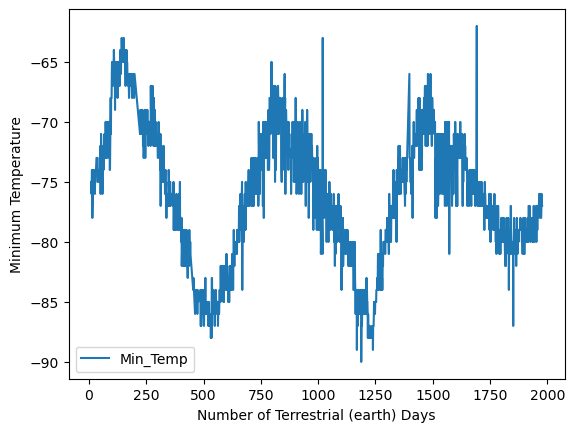

In [77]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days = mars_weather_df.sort_values('Sol')
earth_days.plot(kind='line', x='Sol', y='Min_Temp')
plt.xlabel('Number of Terrestrial (earth) Days')
plt.ylabel('Minimum Temperature')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [78]:
# Write the data to a CSV
mars_weather_df.to_csv('Mars_temps.csv')

In [2]:
driver.quit()